In [1]:
import import_ipynb
import re
import pandas as pd
import numpy as np
import emoji
from collections import Counter
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Definition of Functions

In [2]:
# Extract the Date time
def date_time(s):
    pattern='^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result=re.match(pattern, s)
    if result:
        return True
    return False 

# Extract contacts
def find_contact(s):
    s=s.split(":")
    if len(s)==2:
        return True
    else:
        return False
    
# Extract Message
def getMassage(line):
    splitline=line.split(' - ')
    datetime= splitline[0];
    date, time= datetime.split(', ')
    message=" ".join(splitline[1:])
    
    if find_contact(message):
        splitmessage=message.split(": ")
        author=splitmessage[0]
        message=splitmessage[1]
    else:
        author=None
    return date, time, author, message
    

In [3]:
data=[]
conversation='C:\\Users\\SIDDHARTHA\\Desktop\\SGP_Project\\WhatsApp Chat with Soumalya.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer=[]
    date, time, author= None, None, None
    while True:
        line=fp.readline()
        if not line:
            break
        line=line.strip()
        if date_time(line):
            if len(messageBuffer) >0:
                data.append([date, time, author, ''.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message=getMassage(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

# analyse the sentiments

In [4]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
sentiments=SentimentIntensityAnalyzer()

df=pd.DataFrame(data, columns=["Date", "Time", "contact", "Message"])
df['Date']=pd.to_datetime(df['Date'])

data=df.dropna()

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
sentiments=SentimentIntensityAnalyzer()

data["positive"]=[sentiments.polarity_scores(i)["pos"] for i in data["Message"]]
data["negative"]=[sentiments.polarity_scores(i)["neg"] for i in data["Message"]]
data["neutral"]=[sentiments.polarity_scores(i)["neu"] for i in data["Message"]]

data.head()

,Date,Time,contact,Message,positive,negative,neutral
0,2021-09-25,15:47,Soumalya,🥰❤️,0.593,0.0,0.407
1,2021-05-10,14:56,Soumalya,Oii hindi na English,0.000,0.0,1.000
2,2021-05-10,16:40,Siddhartha Biswas,English,0.000,0.0,1.000
3,2021-10-10,19:51,Siddhartha Biswas,Pujoy Thakur dekhte kobe theke berobi ?,0.000,0.0,1.000
4,2021-10-10,20:10,Soumalya,Kono eche nai vai,0.000,0.0,1.000


In [5]:
x=sum(data["positive"])
y=sum(data["negative"])
z=sum(data["neutral"])

def score(a,b,c):
    if (a>b) and (a>c):
        print("Positive ")
    if (b>a) and (b>c):
        print("Negative")
    if (c>a) and (c>b):
        print("Neutal")

score(x,y,z)

Neutal


In [6]:
df.contact.unique()

array(['Soumalya', 'Siddhartha Biswas'], dtype=object)

In [7]:
media_messages = df[df['Message'] == 'Oke'].shape[0]
print(media_messages)

0


In [8]:
def split_count(text):

    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)

    return emoji_list

In [9]:
import regex
df["emoji"] = df["Message"].apply(split_count)
emojis = sum(df['emoji'].str.len())
df.head(50)

,Date,Time,contact,Message,emoji
0,2021-09-25,15:47,Soumalya,🥰❤️,[]
1,2021-05-10,14:56,Soumalya,Oii hindi na English,[]
2,2021-05-10,16:40,Siddhartha Biswas,English,[]
3,2021-10-10,19:51,Siddhartha Biswas,Pujoy Thakur dekhte kobe theke berobi ?,[]
4,2021-10-10,20:10,Soumalya,Kono eche nai vai,[]
5,2021-10-10,20:10,Soumalya,ak din berote pari,[]
6,2021-05-11,12:24,Soumalya,PTT-20211105-WA0005.opus (file attached),[]
7,2021-05-11,12:56,Soumalya,Link ke giye kotha theke download korte hobe a...,[]
8,2021-05-11,13:09,Siddhartha Biswas,Dekh bujhe jabi,[]
9,2021-05-11,13:10,Siddhartha Biswas,Dekhbi fastest G-drive bole ekta option thakbe,[]


In [10]:
total_emojis_list = list([a for b in df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
for i in emoji_dict:
  print(i)

There are 4625 words in all the messages.


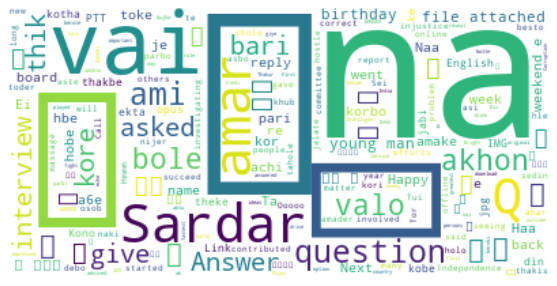

In [11]:
text = " ".join(review for review in df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()